# Bay wheel Data exploratory and visualization
## by Tien Duong

## Preliminary Wrangling

The purpose of this project is explore, analyze and visualize user's behaviors by using the `lyfy_bike_data.csv` of the month July to August 2020. This project is part of the Udacity's Data analysis program. The Dataset contain 13 columns and 154967 rows that extracted from the lyft webpage under bay-wheel >https://www.lyft.com/bikes/bay-wheels/system-data<. The dataset consist of `longtitude` and `latitude` coordinates. Ride_type and ID under `ride_id` and `ride_type`. Start_station_name and ID under `start_station_name` and `start_station_name_id`. End_station_name and ID under `end_station_name` and `end_station_name_id`. Membership type under `member_casual`.

In [5]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [6]:
# Reading in the dataset into pandas
df = pd.read_csv('lyfy_bike_data.csv')
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,68213B7BB2420043,electric_bike,2020-07-31 17:36:17,2020-07-31 17:48:13,NaN,NaN,McAllister St at Baker St,52.0,37.790000,-122.460000,37.777414,-122.441949,casual
1,A64F0CD3A8E59529,electric_bike,2020-07-31 19:42:50,2020-07-31 19:49:54,Buchanan St at North Point St,400.0,Buchanan St at North Point St,400.0,37.804388,-122.433510,37.804408,-122.433509,casual
2,B3690CA0F5179242,electric_bike,2020-07-31 17:18:46,2020-07-31 17:36:31,NaN,NaN,Hyde St at Post St,369.0,37.760000,-122.410000,37.787422,-122.416777,casual
3,162FFE2E157F4C8F,electric_bike,2020-07-31 20:48:47,2020-07-31 21:05:04,Jersey St at Castro St,137.0,NaN,NaN,37.750576,-122.433743,37.770000,-122.420000,casual
4,C5DA8100F428B934,electric_bike,2020-07-31 20:18:24,2020-07-31 20:24:26,Market St at Steuart St,16.0,NaN,NaN,37.794582,-122.394791,37.790000,-122.400000,casual


`The dataset contains 13 columns and 154967 rows`  

My interest from this dataset is that its consist of the record of first month of summer in the Bay Area under COVID-19. Exploring this dataset I hope it will give some insight of people behaviors under something that very new to the current time.

The features that I'll be using from this dataset are `started_at` and `ended_at` to extract our the dates of the week, dates in the month. I will also using these two feature to calculate for duration time per ride. Next, there are station names, so that will give me the name of the station with most bike start out and end with. There's a column of member type, so this will give me type of members using the rides. And lastly, it will be the longtitude and latitude where I will be performing some plotting using the coordinates.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154967 entries, 0 to 154966
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             154967 non-null  object 
 1   rideable_type       154967 non-null  object 
 2   started_at          154967 non-null  object 
 3   ended_at            154967 non-null  object 
 4   start_station_name  102589 non-null  object 
 5   start_station_id    102589 non-null  float64
 6   end_station_name    100407 non-null  object 
 7   end_station_id      100407 non-null  float64
 8   start_lat           154967 non-null  float64
 9   start_lng           154967 non-null  float64
 10  end_lat             154771 non-null  float64
 11  end_lng             154771 non-null  float64
 12  member_casual       154967 non-null  object 
dtypes: float64(6), object(7)
memory usage: 15.4+ MB


## Assessing and cleaning
- Converting `start_time` and `end_time` to datetime
- Calculate duration per ride
- Transforming day of week and date of the month into a column
- Handling missing data

#### 1. Converting to date-time

In [9]:
# Converting star and end time to timestamp
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [10]:
df.started_at.sort_values().head()

57746    2020-07-01 00:00:15
25730    2020-07-01 00:01:40
64752    2020-07-01 00:01:51
122427   2020-07-01 00:02:32
18342    2020-07-01 00:02:44
Name: started_at, dtype: datetime64[ns]

##### 2. Calculate duration 

In [11]:
df['time_duration'] = (df['ended_at'] - df['started_at']).astype('timedelta64[m]')

##### 3. Creating day of the week and month for start and end 

In [12]:
df['start_date_of_month'] = df['started_at'].dt.day
df['start_day_of_week'] = df['started_at'].dt.dayofweek
df['start_month'] = df['started_at'].dt.month

In [13]:
df['end_date_of_month'] = df['ended_at'].dt.day
df['end_day_of_week'] = df['ended_at'].dt.dayofweek
df['end_month'] = df['ended_at'].dt.month

In [14]:
dates= {0:'Sunday', 1:'Monday', 2:'Tuesday',3:'Wednesday',4:'Thursday',
       5:'Friday', 6:'Saturday'}
df['start_day_of_week'] = df['start_day_of_week'].map(dates)
df['end_day_of_week'] = df['end_day_of_week'].map(dates)

In [15]:
df.start_day_of_week.value_counts()

Friday       25923
Thursday     25612
Wednesday    23638
Tuesday      23123
Saturday     22015
Monday       17980
Sunday       16676
Name: start_day_of_week, dtype: int64

In [16]:
df.end_day_of_week.value_counts()

Friday       25933
Thursday     25573
Wednesday    23648
Tuesday      23117
Saturday     22042
Monday       17952
Sunday       16702
Name: end_day_of_week, dtype: int64

##### 4. Handling missing data

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154967 entries, 0 to 154966
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ride_id              154967 non-null  object        
 1   rideable_type        154967 non-null  object        
 2   started_at           154967 non-null  datetime64[ns]
 3   ended_at             154967 non-null  datetime64[ns]
 4   start_station_name   102589 non-null  object        
 5   start_station_id     102589 non-null  float64       
 6   end_station_name     100407 non-null  object        
 7   end_station_id       100407 non-null  float64       
 8   start_lat            154967 non-null  float64       
 9   start_lng            154967 non-null  float64       
 10  end_lat              154771 non-null  float64       
 11  end_lng              154771 non-null  float64       
 12  member_casual        154967 non-null  object        
 13  time_duration 

There are missing data in the `start_station_name`, `start_station_id`, `end_station_name`, `end_station_id`, `end_lat`, and `end_lng`. But these missing values will not affect our statistical calculation, and just to be safe, we will perform feature engineering if necessary.

In [38]:
# Make another file so we dont overwrite the original
df.to_csv('new_df.csv')

# Data Exploratory and Visualization

1. Total member and non-member
2. Find station with longest duration
3. Type of bikes use for member and non-member use
4. Rides use in day of the week
5. Relationship between user types and average duration
6. Location of lyft bike location on map

# Question for this dataset
After visual and descriptive observation of the dataset, I have several questions to evaluate.
- Station start out with the most bikes?
- What kind of bikes does member and non-member use the most
- Day of weeks with ride duration
- Type of user with duration in day of week, and what is the average duration
- Location on map for the longtitude and latitude variables

## Univariate Exploration

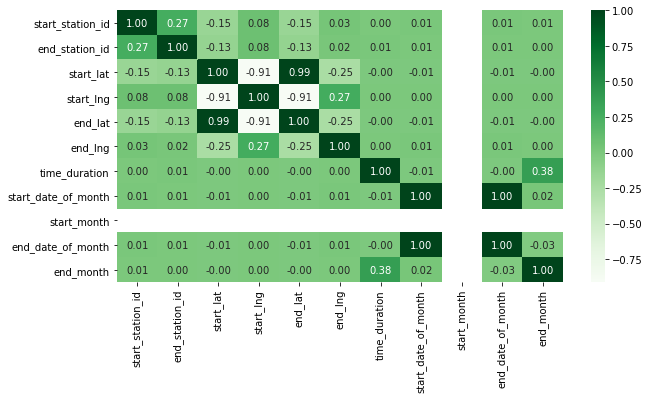

In [19]:
# Checking correlation betweek variables inside the dataset using correlation and heatmap.
plt.figure(figsize=(10,5))
sb.heatmap(df.corr(), annot= True, fmt='.2f', cmap='Greens');

The variables of my interest are mostly independent variables so the performance of correlation between variables does not give any useful insight. However, I did some adjust with the columns by add additional columns rides duration and dates on month and weeks for later computational.

##### 2. Stations start out with the most bike?

In [20]:
# Creating a filteration dataframe to find out 10 tops station names with the most duration time
most_casual = df.groupby(['start_station_name']).agg('sum')
most_casual = most_casual.sort_values(by='time_duration', ascending=False)
top_casual_duration = most_casual[:10].index.tolist()
top_casual_duration

['Civic Center/UN Plaza BART Station (Market St at McAllister St)',
 '7th Ave at Cabrillo St',
 'Powell St BART Station (Market St at 4th St)',
 'Jackson St at Polk St',
 'Union Square (Powell St at Post St)',
 'Frederick St at Arguello Blvd',
 'San Francisco Caltrain (Townsend St at 4th St)',
 'Montgomery St BART Station (Market St at 2nd St)',
 'Sanchez St at 15th St',
 'Central Ave at Fell St']

In [22]:
top10 = df.loc[df['start_station_name'].isin(top_casual_duration)].dropna()
top10.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_duration,start_date_of_month,start_day_of_week,start_month,end_date_of_month,end_day_of_week,end_month
175,70B93EC203343BAE,electric_bike,2020-07-22 21:46:38,2020-07-22 22:22:35,Union Square (Powell St at Post St),324.0,Alamo Square (Steiner St at Fulton St),54.0,37.788633,-122.408345,37.777648,-122.433216,casual,35.0,22,Tuesday,7,22,Tuesday,7
178,B1145F5E40181D6B,electric_bike,2020-07-22 21:46:46,2020-07-22 22:22:43,Union Square (Powell St at Post St),324.0,Alamo Square (Steiner St at Fulton St),54.0,37.788581,-122.408278,37.777637,-122.433212,casual,35.0,22,Tuesday,7,22,Tuesday,7
194,4A76D4C40CD8DD26,electric_bike,2020-07-16 17:03:09,2020-07-16 17:11:30,Central Ave at Fell St,70.0,McAllister St at Arguello Blvd,455.0,37.773465,-122.444311,37.775305,-122.458171,casual,8.0,16,Wednesday,7,16,Wednesday,7
223,01B060DC300C907E,electric_bike,2020-07-31 16:01:22,2020-07-31 16:10:40,Sanchez St at 15th St,95.0,Webster St at O'Farrell St,285.0,37.766301,-122.431223,37.783317,-122.431130,casual,9.0,31,Thursday,7,31,Thursday,7
247,FFCF93BAE6B12C97,electric_bike,2020-07-08 15:42:26,2020-07-08 16:10:59,Union Square (Powell St at Post St),324.0,Randall St at Chenery St,387.0,37.788540,-122.408399,37.739826,-122.425306,casual,28.0,8,Tuesday,7,8,Tuesday,7


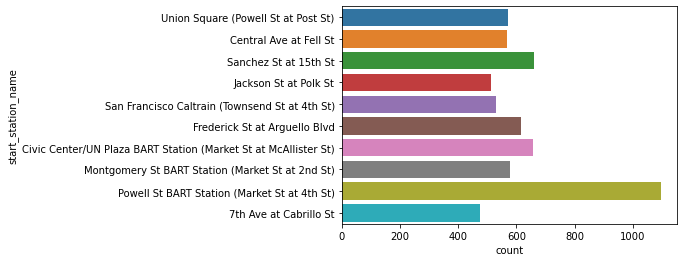

In [23]:
sb.countplot(data=top10, y='start_station_name');

## The type of bikes member and non member use?

To check for different type of user references between each type of bikes, we need to check for numbers of total member and non member type of users. 
#### 1. Member and non-member user

In [24]:
# Column indexing on member_casual and using value_count for return of number of with membership and non-membership
most_casual = df['member_casual'].value_counts()
most_casual

casual    92999
member    61968
Name: member_casual, dtype: int64

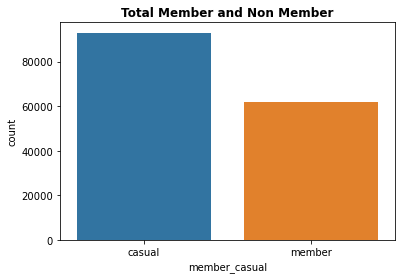

In [25]:
# Bar plot of the total numbers of member and non member
sb.countplot(data=df, x='member_casual');
plt.title('Total Member and Non Member', fontweight='bold');

By using value_count onto the member_casual column, I received the total numbers of member and non membership. There are more people whose are non member operate the bikes throughout the month of July.

####  Number of rides in day of the week

In [29]:
# Checking the total values in each date of week
df.start_day_of_week.value_counts()

Friday       25923
Thursday     25612
Wednesday    23638
Tuesday      23123
Saturday     22015
Monday       17980
Sunday       16676
Name: start_day_of_week, dtype: int64

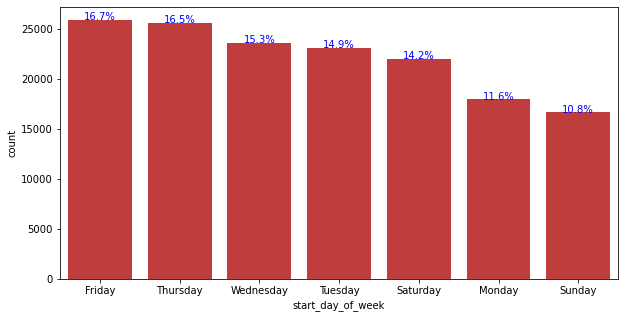

In [30]:
# create the plot
base_color = sb.color_palette()[3]
plt.figure(figsize=(10,5))
sb.countplot(data = df, x = 'start_day_of_week', color = base_color, order=df['start_day_of_week'].value_counts().index)


# add annotations
n_points = df.shape[0]
cat_counts = df['start_day_of_week'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-7, pct_string, ha = 'center', color = 'b')

It seem like most people prefer to stay home on Sunday because the lowest number of rides is on Sunday. But it there aren't much of fluctuation in rides in date of the week.

## Bivariate Exploration

In [27]:
#Using groupby to combines the variable column and reset index to normal indexing
bike_type = df.groupby(['member_casual', 'rideable_type']).size()
bike_type = bike_type.reset_index(name='count')
bike_type

,member_casual,rideable_type,count
0,casual,docked_bike,25515
1,casual,electric_bike,67484
2,member,docked_bike,23421
3,member,electric_bike,38547


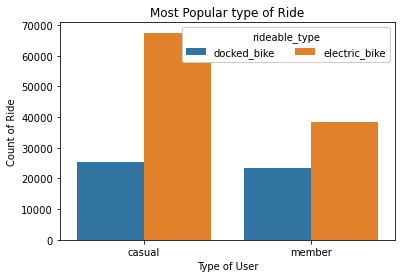

In [28]:
# Bar plot of type of bike for each type of user references
ax = sb.barplot(data =bike_type, x = 'member_casual', y='count',hue = 'rideable_type' )
ax.legend(loc='best', ncol=3, framealpha=1, title='rideable_type');
ax.set(xlabel='Type of User', ylabel='Count of Ride', title='Most Popular type of Ride');

#### Day of the week duration by type of user

/Users/mac/Applications/miniconda3/envs/udacity/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


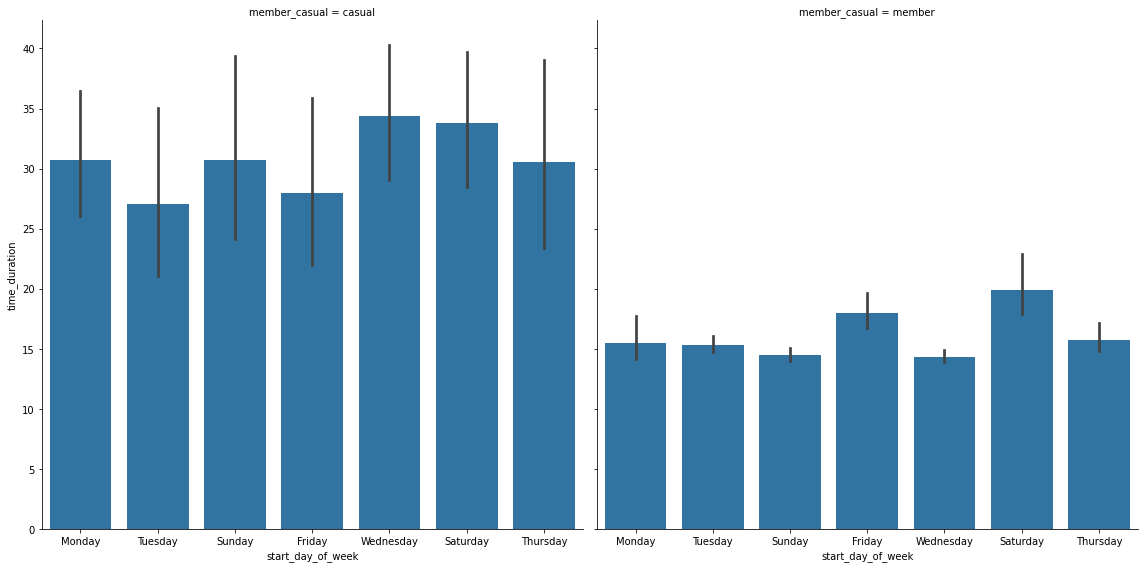

In [31]:
# using bar plot to graph the the relation ship between 3 variables
g = sb.FacetGrid(data=df, col='member_casual',height=8)
g.map(sb.barplot, 'start_day_of_week', 'time_duration');


Most user refer to operate the electric bike because it's faster and less of physical demand since San Francisco does have large numbers of hills. And there's also more non member in using the lift bike in the month of July.

## Multivariate Exploration

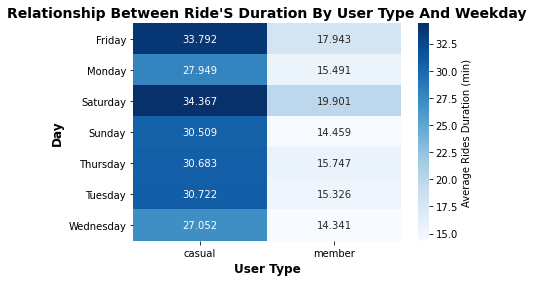

In [32]:

#--Calculating the average of ride's duration
#--Transforming the data in a pivot table to plot the heatmap
c_ = df.groupby(['member_casual','start_day_of_week']).mean()['time_duration']
c_ = c_.reset_index(name = 'average_duration')
c_ = c_.pivot(index = 'start_day_of_week', columns = 'member_casual', 
                            values = 'average_duration')
sb.heatmap(c_, annot = True, fmt = '.3f', 
           cbar_kws = {'label':'Average Rides Duration (min)'}, cmap = 'Blues')


# Add title and format it
plt.title("Relationship between ride's duration By user type and weekday".title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('User Type'.title(),
               fontsize = 12, weight = "bold")
# Add y label and format it
plt.ylabel('Day'.title(),
               fontsize = 12, weight = "bold");

Just like our previous result, we know that majority of rides operator users are from non membership type. The two most average rides duration is on Saturday and Friday because those are the two day people come out of their house. It's also same on member type, two highest average duration are also on Friday and Saturday.

##### Graphing the location of each bikes using longtitude and latitude
This part of the project is outside of the course but I want to plot the given longtitude and latitude, so I decided to do my own research and performed geograph of the given coordinates.  

The shapefile I extracted is from https://data.sfgov.org/Geographic-Locations-and-Boundaries/Bay-Area-Counties/s9wg-vcph. Another source of reference help me in generates the graph from https://medium.com/@ianforrest11/graphing-latitudes-and-longitudes-on-a-map-bf64d5fca391.

In [33]:
# Using geopandas import the shapefile in geopandas
street_map = gpd.read_file('geo_export_ade4f47c-e11e-43b0-8565-83ef2c278f4c.shp')
# keys for assign for coorinate variable
crs = {"init":"EPSG:4326"}
# zip x and y coordinate under one feature
geometry = [Point(xy) for xy in zip(df['start_lng'],
                                    df['start_lat'])]

In [34]:
# Convert file in geodataframe
geo_df = gpd.GeoDataFrame(df,crs=crs, geometry=geometry)
# Extract the variable columns
geo_df = df[['geometry','time_duration']]
# Finalize and convert the extract file again to geodataframe
geo_df = gpd.GeoDataFrame(geo_df,crs=crs, geometry=geometry)

/Users/mac/Applications/miniconda3/envs/udacity/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


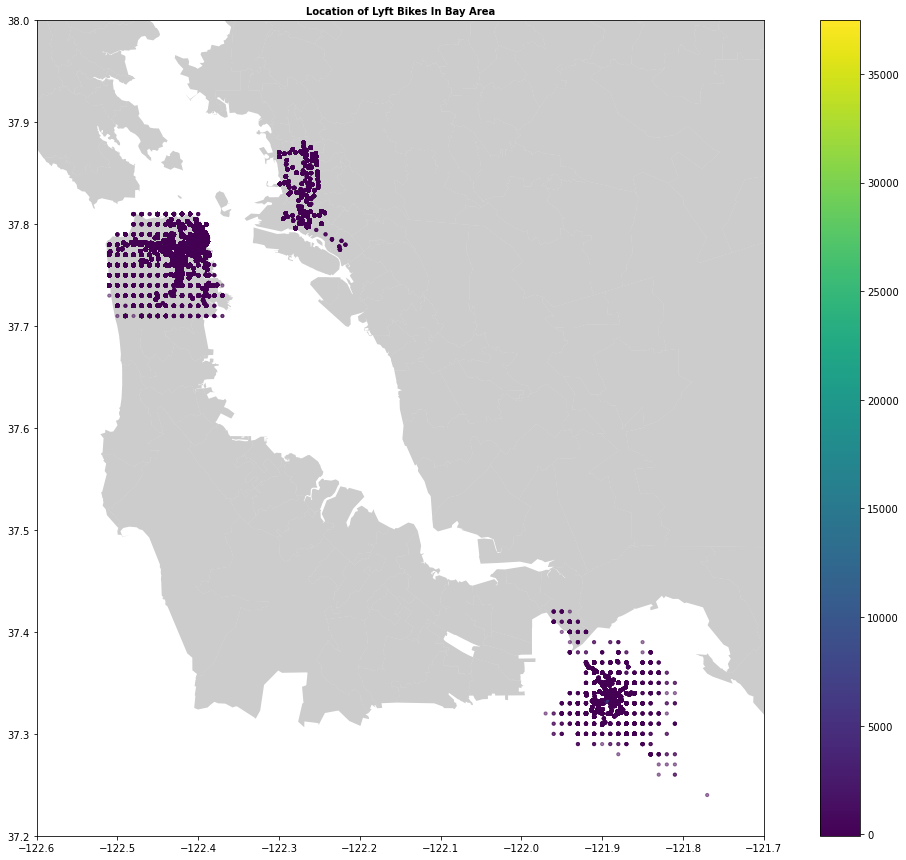

In [35]:
# create subplot
fix,ax = plt.subplots(figsize=(20,15))
# plotting the shapefile
street_map.plot(ax=ax, alpha=0.4, color='grey')
# plotting our coordinates
geo_df.plot(column='time_duration', ax=ax, alpha=0.5,
           legend=True, markersize=10);
# plot labels
plt.title('Location of Lyft Bikes In Bay Area',fontsize=10, fontweight='bold')

plt.xlim(-122.6,-121.7)
plt.ylim(37.2,38)
plt.show();

## Conclusion
In our result concluding the analysis, we was able to observe the different type of user behaviors between member and non member on different day of the week. Majority of the rides operate on Friday and Saturday by non-member and majority prefer using the electric bike over normal bike. Also by looking into the coordinates graph with time duration, majority of rides happen in San Francisco downtown city. 

The insight of this dataset give us the advantage of user's behavior that can help make business decision that bases on data driven methodologies. These improvement method however can continue to be more efficient overtime as we continue to reinforce our method by collecting more data from the user's behaviors.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!